In [ ]:
import matplotlib.pyplot as plot
import networkx as nx

g = nx.DiGraph(directed=True)

g.add_node("ROOT")

for i in range(5):
    g.add_node("Child_%i" % i)
    g.add_node("Grandchild_%i" % i)
    g.add_node("Greatgrandchild_%i" % i)

    g.add_edge("ROOT", "Child_%i" % i)
    g.add_edge("Child_%i" % i, "Grandchild_%i" % i)
    g.add_edge("Grandchild_%i" % i, "Greatgrandchild_%i" % i)

# write dot file to use with graphviz
# run "dot -Tpng test.dot >test.png"
# write_dot(G,'test.dot')

# same layout using matplotlib with no labels
plot.title('draw_networkx')
pos = nx.drawing.nx_agraph.graphviz_layout(g, prog='dot')
nx.draw(g, pos, with_labels=True, arrows=True)

plot.show()

In [ ]:
import matplotlib.pyplot as plot
import networkx as nx

g = nx.DiGraph(directed=True)

n = 'data'
n2 = ' data'
f = 'function'
f2 = ' function'
o = 'operator'
c = 'operator\n(currying)'
fl = 'functional'

g.add_nodes_from([n])

g.add_nodes_from([f, fl, o, c])

g.add_nodes_from([n2, f2])

g.add_edge(n, f, middle=True)
g.add_edge(f, n2)
g.add_edge(f, o, middle=True)
g.add_edge(o, f2)
g.add_edge(f, fl, middle=True)
g.add_edge(fl, n2)
g.add_edge(n, c, middle=True)
g.add_edge(c, f2)

nodeOpt = {
    # 'node_color': 'blue',
    'pos': nx.drawing.nx_agraph.graphviz_layout(g, prog='dot'),
    # 'ax': ax,
    # 'node_size': 5000,
    'node_shape': "o",
    # 'clip_on': False,
    # 'Rotate': False,
    'font_family': 'humor sans'
}
arrowHeadOpt = {
    **nodeOpt,
    'width': 2,
    'arrowstyle': 'wedge',
    'arrowsize': 30,
}
arrowTailOpt = {
    **arrowHeadOpt,
    'arrowstyle': '-|>',
}

with plot.xkcd():
    fig,ax = plot.subplots(1)
    ax.set_ylabel('go up')
    ax.set_xlabel('go right')


    # nx.drawing.draw_networkx_nodes(g, arrows=True, **options)
    nx.drawing.draw_networkx_labels(g, arrows=True, **nodeOpt)

    edges = g.edges.data()
    attrs = nx.get_edge_attributes(g, 'middle')

    heads = [e for e in edges if ('middle' in e[2])]
    nx.drawing.draw_networkx_edges(g, edgelist=heads, arrows=True, **arrowHeadOpt)

    tails = [e for e in edges if ('middle' not in e[2])]
    nx.drawing.draw_networkx_edges(g, edgelist=tails, arrows=True, **arrowTailOpt)
    # nx.drawing.draw_networkx_edge_labels(
    #     G,
    #     edge_labels=nx.get_edge_attributes(G, 'label'),
    #     **options
    # )

# plot.axis('off')
plot.show()



<class 'matplotlib.axes._subplots.AxesZeroSubplot'>


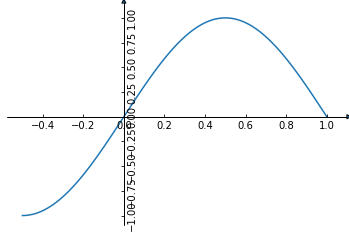

In [3]:
from mpl_toolkits.axisartist.axislines import SubplotZero
import matplotlib.pyplot as plt
import numpy as np

if 1:
    fig = plt.figure(1)
    ax = SubplotZero(fig, 111)
    print(type(ax))
    fig.add_subplot(ax)

    for direction in ["xzero", "yzero"]:
        # adds arrows at the ends of each axis
        ax.axis[direction].set_axisline_style("-|>")

        # adds X and Y-axis from the origin
        ax.axis[direction].set_visible(True)

    for direction in ["left", "right", "bottom", "top"]:
        # hides borders
        ax.axis[direction].set_visible(False)

    x = np.linspace(-0.5, 1., 100)
    ax.plot(x, np.sin(x*np.pi))

    plt.show()